In [2]:
import numpy as np
import matplotlib.pyplot as plt

##### 1 - Погрешность приближения по производной

In [1]:
# f(x) = 2.1*x4 - 9.0*х2 - 5*x + 3.5.

def f(x):
    return 2.1*x**4 - 9.0*x**2 - 5*x + 3.5

def df(x):
    return 8.4*x**3 - 18.0*x - 5

x = 3.0

print(df(x))

167.8


##### 2 - Метод Ньютона

In [3]:
# f(x) = 3.7*x4 - 8.7*х2 - 5*x + 8.5.

def f(x):
    return 3.7*x**4 - 8.7*x**2 - 5*x + 8.5

def df(x):
    return 14.8*x**3 - 17.4*x - 5

def d2f(x):
    return 44.4*x**2 - 17.4

x = 2.2

newx = x - df(x)/d2f(x)
print(newx, np.round(newx, 2))

1.6212014420545227 1.62


##### 3 - Метод дихотомии

In [8]:
# f(x) = 3.6*x2 - x*√3 + 1.4

def f(x):
    return 3.6*x**2 - np.sqrt(3)*x + 1.4

a = 0
b = 2
dx = 1e-5

for _ in range(3):
    x1 = (a+b)/2 - dx
    x2 = (a+b)/2 + dx
    f1 = f(x1)
    f2 = f(x2)

    if f1<f2:
        b = x2
    elif f1>f2:
        a = x1
    else:
        a = x1
        b = x2
    print( 'f1:', f1, 'f2:', f2)
    print('a:', a, 'b:', b)

print((a + b) / 2)

f1: 3.2678945132991988 f2: 3.2680038722830473
a: 0 b: 1.00001
f1: 1.433965256559599 f2: 1.4340026162634478
a: 0 b: 0.500015
f1: 1.1919871282572996 f2: 1.1919884883211482
a: 0 b: 0.2500175
0.12500875


##### 4 - Золотое сечение

x1: 1.184094634875326 x2: 1.915905365124674
f1: 4.875952275749971 f2: 11.094842679884849
a: 0 b: 1.915905365124674
(a+b)/2: 0.957952682562337 0.96


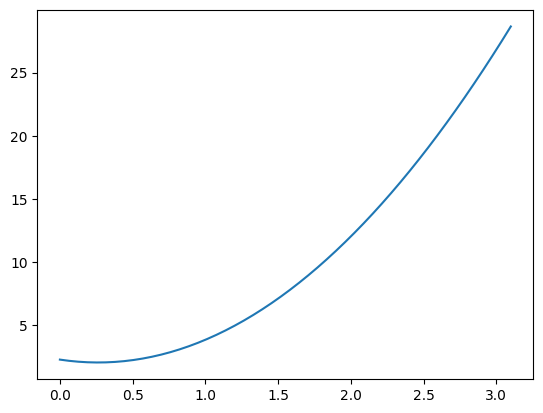

In [9]:
# f(x) = 3.3*x2 - x*√3 + 2.3

def f(x):
    return 3.3*x**2 - x*np.sqrt(3) + 2.3

a, b = 0, 3.1

# Метод золотого сечения
def gs(f, a, b, eps_x=0.025):
    nf = 0
    tau = (1 + np.sqrt(5))/2

    if (b-a)/2 > eps_x:
        coeff = (b-a)/tau
        x1 = b - coeff
        x2 = a + coeff
        f1 = f(x1)
        f2 = f(x2)

        print('x1:', x1, 'x2:', x2)
        print('f1:', f1, 'f2:', f2)

        if f1 < f2:
            b = x2
            x2 = x1
            coeff = (b-a)/tau
            x1 = b - coeff
            f2 = f1
            f1 = f(x1)
            nf += 1
        elif f1 > f2:
            a = x1
            x1 = x2
            coeff = (b-a)/tau
            x2 = a + coeff
            f1 = f2
            f2 = f(x2)
            nf += 1
        else:
            a = x1
            b = x2
            coeff = (b-a)/tau
            x1 = b - coeff
            x2 = a + coeff
            f1 = f(x1)
            f2 = f(x2)
            nf += 2

        print('a:', a, 'b:', b)
        print('(a+b)/2:', (a+b)/2, np.round((a+b)/2, 2))
    return (a+b)/2, (b-a)/2, nf

# print(gs(f, a, b))
gs(f, a, b)

x = np.linspace(a, b, 50)
plt.plot(x, f(x))

##### 5 - Погрешность по градиенту

In [4]:
# f(x,y) =7.0* x2 -3.1*х + y2

def f(x, y):
    return 7.0*x**2 - 3.1*x + y**2

def df(x, y):
    return (14*x - 3.1, 2*y)

x = np.array([0.7, 0.3])

grd = df(*x)
print(grd)

grdlen = np.linalg.norm(grd, ord=2)
print(grdlen, np.round(grdlen, 2))

(6.699999999999999, 0.6)
6.726812023536855 6.73


##### 6 - Нелдер и Мид

In [16]:
# f(x,y) = x2 - 2х + y4
# v1(0;2), v2(0,4), v3(-1; 5.0)

def f(x, y):
    return x**2 - 2*x + y**4

Xsimplex = np.array([[0., 2.], [0., 4.], [-1., 5.0]])
print(Xsimplex)

s1 = Xsimplex[0]
s2 = Xsimplex[1]
s3 = Xsimplex[2]

print(f(*s1), f(*s2), f(*s3))

bad = s3
print('Bad:', bad)

center = (s1 + s2) /2
print('Center:', center)


news3 = center + (center - bad)
print('New:', news3)
print('X1:', f(*news3))

news3x2 = center + 2*(center - bad)
print('NewX2:', news3x2)
print('X2:', f(*news3x2))

[[ 0.  2.]
 [ 0.  4.]
 [-1.  5.]]
16.0 256.0 628.0
Bad: [-1.  5.]
Center: [0. 3.]
New: [1. 1.]
X1: 0.0
NewX2: [ 2. -1.]
X2: 1.0


##### 7 - Антиградиентное направление

In [7]:
# f(x,y) =8.9* x2 -5.2*х + y4+1

def f(x,y):
    return 8.9*x**2 - 5.2*x + y**4 + 1

def df(x,y):
    return (17.8*x - 5.2, 4*y**3)

x = np.array([0.8, 0.9])

grd = df(*x)
print('grd:', grd)

grdlen = np.linalg.norm(grd, ord=2)
print('grdlen:', grdlen)

normgrd = grd / grdlen
print('normgrd:', normgrd)

normgrdlen = np.linalg.norm(normgrd, ord=2)
print('normgrdlen:', normgrdlen)

newx = x - normgrd
print('newx:', newx)

grd: (9.040000000000003, 2.9160000000000004)
grdlen: 9.498666011603948
normgrd: [0.95171259 0.30699048]
normgrdlen: 0.9999999999999999
newx: [-0.15171259  0.59300952]


##### 8 - Метод Ньютона

In [20]:
# f(x,y) =8.9* x2 -5.2*х + y4+10

def newton(f, g, h, x):
    gv = g(x)
    hm = h(x)
    dx = np.linalg.solve(hm, -gv)
    x += dx
    return x

def f(x):
    return 8.9*x[0]**2 - 5.2*x[0] + x[1]**4 + 10

def g(x):
    return np.array([17.8*x[0] - 5.2, 4*x[1]**3])

def h(x):
    return np.array([[17.8, 0],[0, 12*x[1]**2]])

x0 = np.array([0.8, 0.9])

print('f(x0):', f(x0))

newx = newton(f, g, h, x0)
print('res:', newx)
print('f(res):', f(newx))

f(x0): 12.192100000000002
res: [0.29213483 0.6       ]
f(res): 9.370049438202248


In [11]:
# f(x,y) =8.9* x2 -5.2*х + y4+10

def newton(f, g, h, x):
    gv = g(*x)
    hm = h(*x)
    dx = np.linalg.solve(hm, -gv)
    x += dx
    return x

def f(x,y):
    return 8.9*x**2 - 5.2*x + y**4 + 10

def g(x,y):
    return np.array([17.8*x - 5.2, 4*y**3])

def h(x,y):
    return np.array([[17.8, 0],[0, 12*y**2]])

x = np.array([0.8, 0.9])

print('f(x):', f(*x))

newx = newton(f, g, h, x)
print('res:', newx)
print('f(res):', f(*newx))

f(x): 12.192100000000002
res: [0.29213483 0.6       ]
f(res): 9.370049438202248
